In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_clean.csv")
data.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_scaled,age_discretized,glucose_discretized
0,1,35.0,0,0,0,23.47,6.6,90,0,-0.686567,1,0


In [5]:
# Splitting the dataset into features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [36]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict on the test data
predictions = knn.predict(X_test)

Accuracy: 0.968
Precision: 1.0
Recall: 0.6
F1 Score: 0.7499999999999999


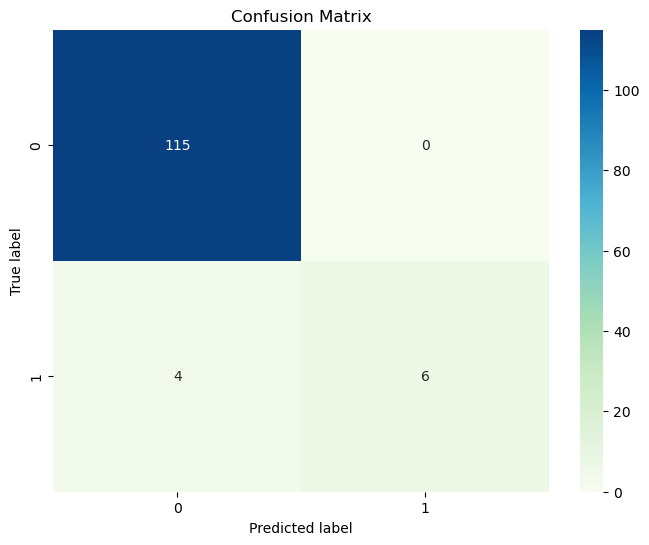

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='GnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       115
           1       1.00      0.60      0.75        10

    accuracy                           0.97       125
   macro avg       0.98      0.80      0.87       125
weighted avg       0.97      0.97      0.96       125



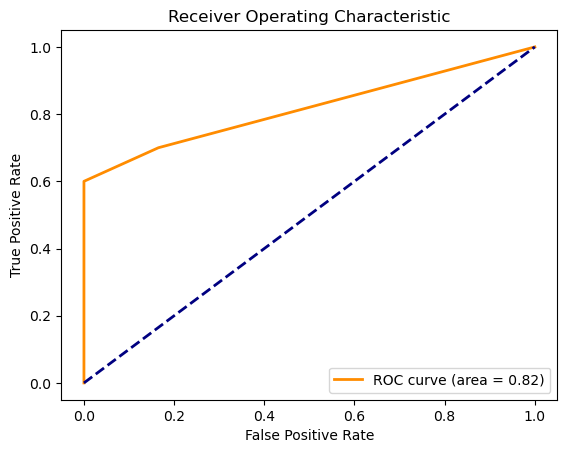

In [46]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [9]:
#def predict_new_data(new_data):
#    prediction_numeric = knn.predict([new_data])
#    return label_encoder.inverse_transform(prediction_numeric)
#new_data = [25, 60, 1, 0] # Replace with actual values
#predicted_class = predict_new_data(new_data)
#print(f'Predicted Class for new data {new_data}: {predicted_class}')